# 🌿 Analyse Exploratoire des Données (EDA)
## Projet : Reconnaissance des Épices Marocaines
---
**Objectif** : Explorer, analyser et visualiser le dataset d'épices avant l'entraînement du modèle.

**Classes (11 épices)** : anis, cannelle, carvi, clou_girofle, cubebe, cumin, curcuma, gingembre, paprika, poivre_noir, safran

**Structure du dataset** :
```
dataset_spices/
├── train/    (70% → 140 images/classe)
├── val/      (15% → 30 images/classe)
└── test/     (15% → 30 images/classe)
```

---
## 📦 Cellule 1 — Installation & Importation des Bibliothèques

In [ ]:
# =====================================================================
# INSTALLATION DES BIBLIOTHÈQUES (exécuter UNE seule fois)
# =====================================================================
# %pip install Pillow matplotlib seaborn scikit-learn numpy pandas -q

In [1]:
# =====================================================================
# IMPORTATION DES BIBLIOTHÈQUES
# =====================================================================
import os                          # Gérer les fichiers et dossiers
import numpy as np                 # Calculs numériques
import pandas as pd                # Manipulation de données
import matplotlib.pyplot as plt    # Visualisation (graphiques)
import matplotlib.image as mpimg   # Charger des images
import seaborn as sns              # Graphiques élégants
from PIL import Image              # Ouvrir et analyser les images
from collections import Counter    # Compter les éléments
from sklearn.model_selection import train_test_split  # (pour vérification)

# ---- Configuration des graphiques ----
plt.style.use('seaborn-v0_8-whitegrid')   # Style propre
plt.rcParams['figure.figsize'] = (12, 6)  # Taille par défaut
plt.rcParams['font.size'] = 12            # Taille de police

print('✅ Toutes les bibliothèques sont importées avec succès !')

✅ Toutes les bibliothèques sont importées avec succès !


---
## 📁 Cellule 2 — Définition des Chemins du Dataset

In [2]:
# =====================================================================
# CHEMINS DU DATASET
# ⚠️  Modifiez le chemin BASE_DIR selon votre structure locale
# =====================================================================

BASE_DIR  = '../dataset/splits'          # Dossier racine du dataset
TRAIN_DIR = os.path.join(BASE_DIR, 'train')  # Dossier d'entraînement
VAL_DIR   = os.path.join(BASE_DIR, 'val')    # Dossier de validation
TEST_DIR  = os.path.join(BASE_DIR, 'test')   # Dossier de test

# Liste des 11 épices (triées alphabétiquement)
CLASSES = sorted(os.listdir(TRAIN_DIR))

print(f'📂 Dossier racine   : {BASE_DIR}')
print(f'📂 Dossier train    : {TRAIN_DIR}')
print(f'📂 Dossier val      : {VAL_DIR}')
print(f'📂 Dossier test     : {TEST_DIR}')
print(f'\n🌿 Nombre de classes : {len(CLASSES)}')
print(f'🌿 Classes détectées : {CLASSES}')

📂 Dossier racine   : ../dataset/splits
📂 Dossier train    : ../dataset/splits\train
📂 Dossier val      : ../dataset/splits\val
📂 Dossier test     : ../dataset/splits\test

🌿 Nombre de classes : 11
🌿 Classes détectées : ['anis', 'cannelle', 'carvi', 'clou_girofle', 'cubebe', 'cumin', 'curcuma', 'gingembre', 'paprika', 'poivre noir', 'safran']


---
## 📊 Cellule 3 — Comptage des Images par Classe et par Ensemble

In [3]:
# =====================================================================
# FONCTION : Compter les images dans chaque sous-dossier
# =====================================================================
def compter_images(dossier_racine):
    """Retourne un dictionnaire {classe: nombre_d'images}"""
    comptage = {}
    for classe in sorted(os.listdir(dossier_racine)):
        chemin_classe = os.path.join(dossier_racine, classe)
        if os.path.isdir(chemin_classe):  # Vérifier que c'est un dossier
            fichiers = os.listdir(chemin_classe)
            comptage[classe] = len(fichiers)
    return comptage

# ---- Compter pour chaque ensemble ----
comptage_train = compter_images(TRAIN_DIR)
comptage_val   = compter_images(VAL_DIR)
comptage_test  = compter_images(TEST_DIR)

# ---- Créer un DataFrame (tableau) pour afficher les résultats ----
df_comptage = pd.DataFrame({
    'Classe'       : list(comptage_train.keys()),
    'Train (70%)'  : list(comptage_train.values()),
    'Val (15%)'    : list(comptage_val.values()),
    'Test (15%)'   : list(comptage_test.values())
})

# Ajouter une colonne 'Total' par classe
df_comptage['Total'] = df_comptage['Train (70%)'] + df_comptage['Val (15%)'] + df_comptage['Test (15%)']

# Ajouter une ligne de TOTAL au bas du tableau
ligne_total = pd.DataFrame([{
    'Classe': '--- TOTAL ---',
    'Train (70%)': df_comptage['Train (70%)'].sum(),
    'Val (15%)': df_comptage['Val (15%)'].sum(),
    'Test (15%)': df_comptage['Test (15%)'].sum(),
    'Total': df_comptage['Total'].sum()
}])

df_affichage = pd.concat([df_comptage, ligne_total], ignore_index=True)

print('📊 RÉPARTITION DES IMAGES PAR CLASSE')
print('=' * 60)
print(df_affichage.to_string(index=False))

📊 RÉPARTITION DES IMAGES PAR CLASSE
       Classe  Train (70%)  Val (15%)  Test (15%)  Total
         anis          140         30          30    200
     cannelle          140         30          30    200
        carvi          140         30          30    200
 clou_girofle          140         30          30    200
       cubebe          140         30          30    200
        cumin          140         30          30    200
      curcuma          140         30          30    200
    gingembre          140         30          30    200
      paprika          140         30          30    200
  poivre noir          140         30          30    200
       safran          140         30          30    200
--- TOTAL ---         1540        330         330   2200


---
## 📈 Cellule 4 — Visualisation : Nombre d'Images par Classe (Train)

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\2226857595.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


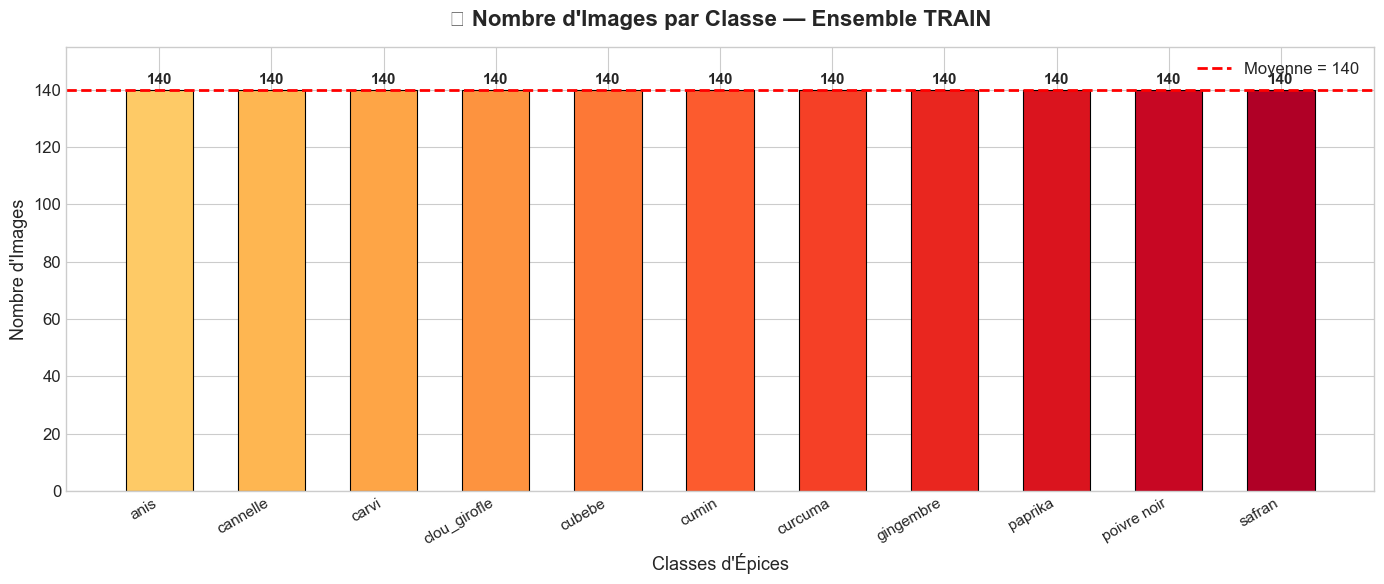

In [4]:
# =====================================================================
# GRAPHIQUE 1 : Nombre d'images par classe dans l'ensemble TRAIN
# =====================================================================
fig, ax = plt.subplots(figsize=(14, 6))

# Couleurs pour chaque barre (palette chaude)
couleurs = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(CLASSES)))

# Créer le graphique à barres
barres = ax.bar(df_comptage['Classe'], df_comptage['Train (70%)'], color=couleurs, 
                edgecolor='black', linewidth=0.8, width=0.6)

# Ajouter les valeurs sur chaque barre
for barre in barres:
    hauteur = barre.get_height()
    ax.text(barre.get_x() + barre.get_width()/2., hauteur + 1,
            f'{int(hauteur)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Ligne horizontale pour la moyenne
moyenne_train = df_comptage['Train (70%)'].mean()
ax.axhline(y=moyenne_train, color='red', linestyle='--', linewidth=2, label=f'Moyenne = {moyenne_train:.0f}')

# Titres et labels
ax.set_title('📊 Nombre d\'Images par Classe — Ensemble TRAIN', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Classes d\'Épices', fontsize=13)
ax.set_ylabel('Nombre d\'Images', fontsize=13)
ax.legend(fontsize=12)
ax.set_ylim(0, max(df_comptage['Train (70%)']) + 15)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

---
## 🥧 Cellule 5 — Visualisation : Répartition Train / Val / Test

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\1060413115.py:37: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


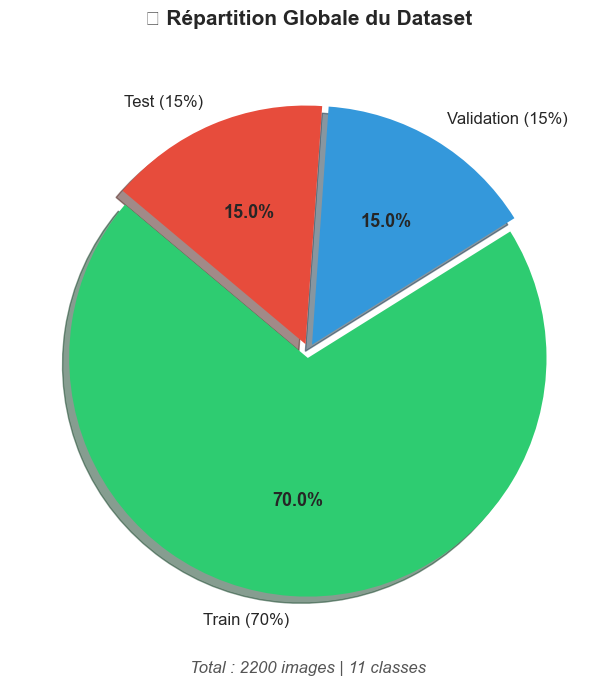

In [5]:
# =====================================================================
# GRAPHIQUE 2 : Pie chart de la répartition globale (Train/Val/Test)
# =====================================================================
totaux = [
    df_comptage['Train (70%)'].sum(),
    df_comptage['Val (15%)'].sum(),
    df_comptage['Test (15%)'].sum()
]
labels = ['Train (70%)', 'Validation (15%)', 'Test (15%)']
couleurs_pie = ['#2ecc71', '#3498db', '#e74c3c']

fig, ax = plt.subplots(figsize=(8, 7))

wedges, texts, autotexts = ax.pie(
    totaux,
    labels=labels,
    colors=couleurs_pie,
    autopct='%1.1f%%',       # Afficher le pourcentage
    startangle=140,
    explode=(0.03, 0.03, 0.03),  # Séparer légèrement les parts
    shadow=True
)

# Styler les textes
for text in autotexts:
    text.set_fontsize(13)
    text.set_fontweight('bold')
for text in texts:
    text.set_fontsize(12)

ax.set_title('🥧 Répartition Globale du Dataset', fontsize=15, fontweight='bold', pad=20)

# Ajouter les nombres absolus
ax.text(0, -1.35, f'Total : {sum(totaux)} images | {len(CLASSES)} classes',
        ha='center', fontsize=12, style='italic', color='#555555')

plt.tight_layout()
plt.show()

---
## 📸 Cellule 6 — Visualisation : Exemples d'Images par Classe

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\741879885.py:32: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


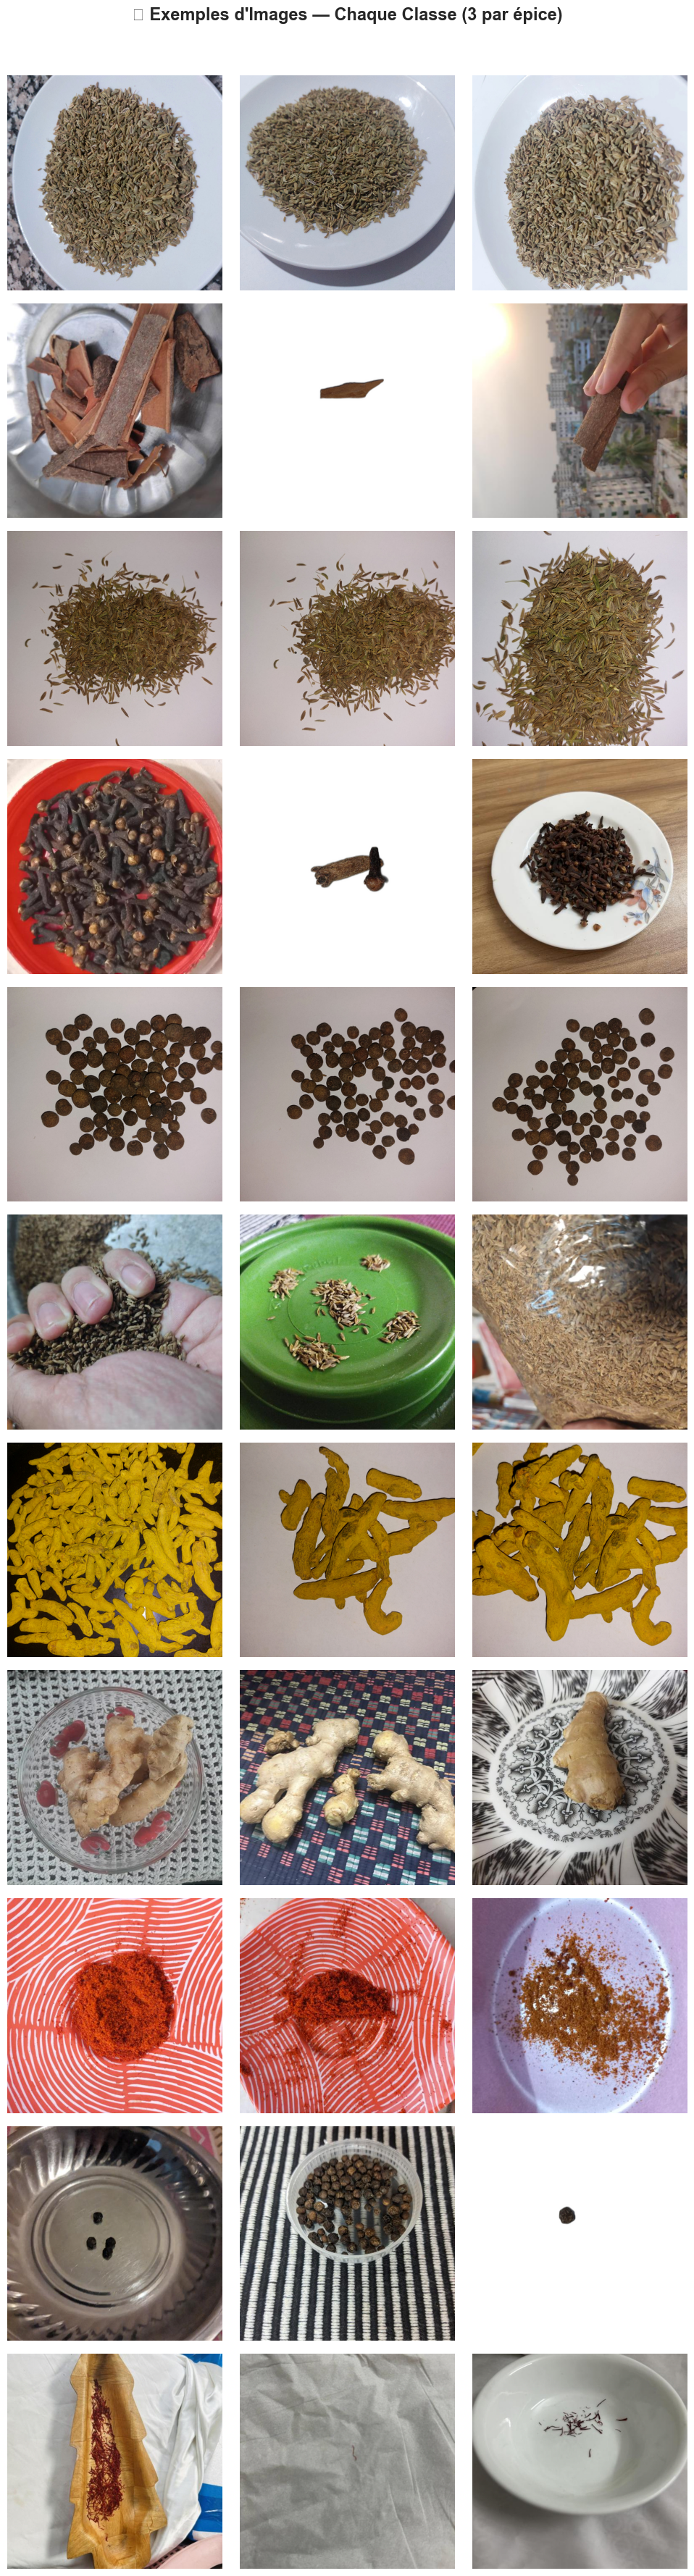

In [6]:
# =====================================================================
# GRAPHIQUE 3 : Afficher 3 exemples d'images pour chaque classe
# =====================================================================
NB_EXEMPLES = 3  # Nombre d'images à afficher par classe

fig, axes = plt.subplots(len(CLASSES), NB_EXEMPLES, figsize=(10, 3.2 * len(CLASSES)))

for i, classe in enumerate(CLASSES):
    # Chemin vers le dossier de la classe dans TRAIN
    dossier_classe = os.path.join(TRAIN_DIR, classe)
    fichiers = sorted(os.listdir(dossier_classe))[:NB_EXEMPLES]  # 3 premières images
    
    for j, fichier in enumerate(fichiers):
        # Charger l'image
        chemin_image = os.path.join(dossier_classe, fichier)
        image = Image.open(chemin_image)
        
        # Afficher dans le subplot
        axes[i, j].imshow(image)
        axes[i, j].axis('off')  # Cacher les axes
        
        # Titre : nom de la classe (uniquement sur la première colonne)
        if j == 0:
            axes[i, j].set_ylabel(classe.replace('_', ' ').title(), 
                                  fontsize=13, fontweight='bold', rotation=0, 
                                  labelpad=80, ha='right', va='center')

# Titre principal
fig.suptitle('📸 Exemples d\'Images — Chaque Classe (3 par épice)', 
             fontsize=17, fontweight='bold', y=1.01)

plt.tight_layout()
plt.show()

---
## 📐 Cellule 7 — Analyse des Dimensions des Images

In [7]:
# =====================================================================
# ANALYSE : Vérifier les dimensions (largeur x hauteur) de toutes les images
# =====================================================================
dimensions = []  # Liste pour stocker (largeur, hauteur, classe)

for classe in CLASSES:
    dossier = os.path.join(TRAIN_DIR, classe)
    for fichier in os.listdir(dossier):
        chemin = os.path.join(dossier, fichier)
        img = Image.open(chemin)
        dimensions.append({
            'Classe': classe,
            'Largeur': img.size[0],
            'Hauteur': img.size[1],
            'Mode': img.mode  # RGB, RGBA, etc.
        })

df_dim = pd.DataFrame(dimensions)

# ---- Résumé statistique ----
print('📐 ANALYSE DES DIMENSIONS DES IMAGES (ensemble TRAIN)')
print('=' * 55)
print(f'  Largeur  — Min: {df_dim["Largeur"].min()} | Max: {df_dim["Largeur"].max()} | Moy: {df_dim["Largeur"].mean():.0f}')
print(f'  Hauteur  — Min: {df_dim["Hauteur"].min()} | Max: {df_dim["Hauteur"].max()} | Moy: {df_dim["Hauteur"].mean():.0f}')
print(f'  Modes détectés : {df_dim["Mode"].unique()}')
print()

# ---- Dimensions uniques ----
df_dim['Dimension'] = df_dim['Largeur'].astype(str) + ' x ' + df_dim['Hauteur'].astype(str)
print('📏 Dimensions uniques trouvées :')
print(df_dim['Dimension'].value_counts().to_string())

📐 ANALYSE DES DIMENSIONS DES IMAGES (ensemble TRAIN)
  Largeur  — Min: 384 | Max: 4000 | Moy: 610
  Hauteur  — Min: 384 | Max: 4000 | Moy: 701
  Modes détectés : ['RGB']

📏 Dimensions uniques trouvées :
Dimension
512 x 512      908
384 x 384      441
591 x 1280      55
2250 x 4000     42
720 x 1280      29
3000 x 4000     24
4000 x 3000      8
4000 x 2250      7
960 x 1280       7
1280 x 960       5
738 x 1600       5
590 x 1280       4
1200 x 1600      4
1600 x 720       1


---
## 🎨 Cellule 8 — Analyse des Couleurs Moyennes par Classe

In [8]:
# =====================================================================
# ANALYSE COULEUR : Calculer la couleur moyenne (R, G, B) par classe
# =====================================================================
couleurs_moyennes = []  # Stocker les résultats

for classe in CLASSES:
    dossier = os.path.join(TRAIN_DIR, classe)
    r_total, g_total, b_total = 0, 0, 0
    nb_images = 0
    
    for fichier in os.listdir(dossier):
        chemin = os.path.join(dossier, fichier)
        img = Image.open(chemin).convert('RGB')  # Forcer le mode RGB
        pixels = np.array(img)  # Convertir en tableau numpy
        
        # Calculer la moyenne R, G, B de cette image
        r_total += pixels[:,:,0].mean()
        g_total += pixels[:,:,1].mean()
        b_total += pixels[:,:,2].mean()
        nb_images += 1
    
    # Moyenne finale pour cette classe
    couleurs_moyennes.append({
        'Classe': classe,
        'R': r_total / nb_images,
        'G': g_total / nb_images,
        'B': b_total / nb_images
    })

df_couleurs = pd.DataFrame(couleurs_moyennes)

print('🎨 COULEURS MOYENNES PAR CLASSE (valeurs 0–255)')
print('=' * 50)
print(df_couleurs.round(1).to_string(index=False))

🎨 COULEURS MOYENNES PAR CLASSE (valeurs 0–255)
      Classe     R     G     B
        anis 148.1 145.0 143.4
    cannelle 173.7 161.5 155.6
       carvi 159.4 144.8 130.2
clou_girofle 197.3 191.2 188.8
      cubebe 147.9 136.1 129.4
       cumin 139.6 124.9 112.7
     curcuma 135.9 113.6  87.9
   gingembre 131.6 125.3 114.8
     paprika 150.1 120.5 109.3
 poivre noir 202.6 199.0 192.5
      safran 154.7 148.5 134.3


---
## 🎨 Cellule 9 — Visualisation : Barres de Couleur Moyenne + Histogramme RGB

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\2487492459.py:16: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


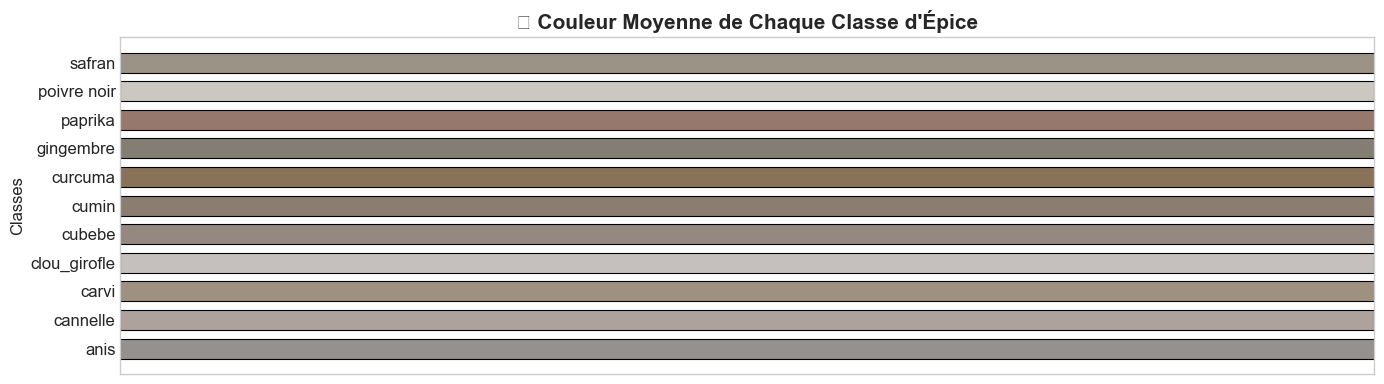

In [9]:
# =====================================================================
# GRAPHIQUE 4 : Barres de couleur moyenne pour chaque classe
# =====================================================================
fig, ax = plt.subplots(figsize=(14, 4))

for i, row in df_couleurs.iterrows():
    # Normaliser les valeurs RGB entre 0 et 1 pour matplotlib
    couleur_norm = (row['R']/255, row['G']/255, row['B']/255)
    ax.barh(row['Classe'], 1, color=couleur_norm, edgecolor='black', linewidth=0.8, height=0.7)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_title('🎨 Couleur Moyenne de Chaque Classe d\'Épice', fontsize=15, fontweight='bold')
ax.set_ylabel('Classes', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\3624103139.py:22: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


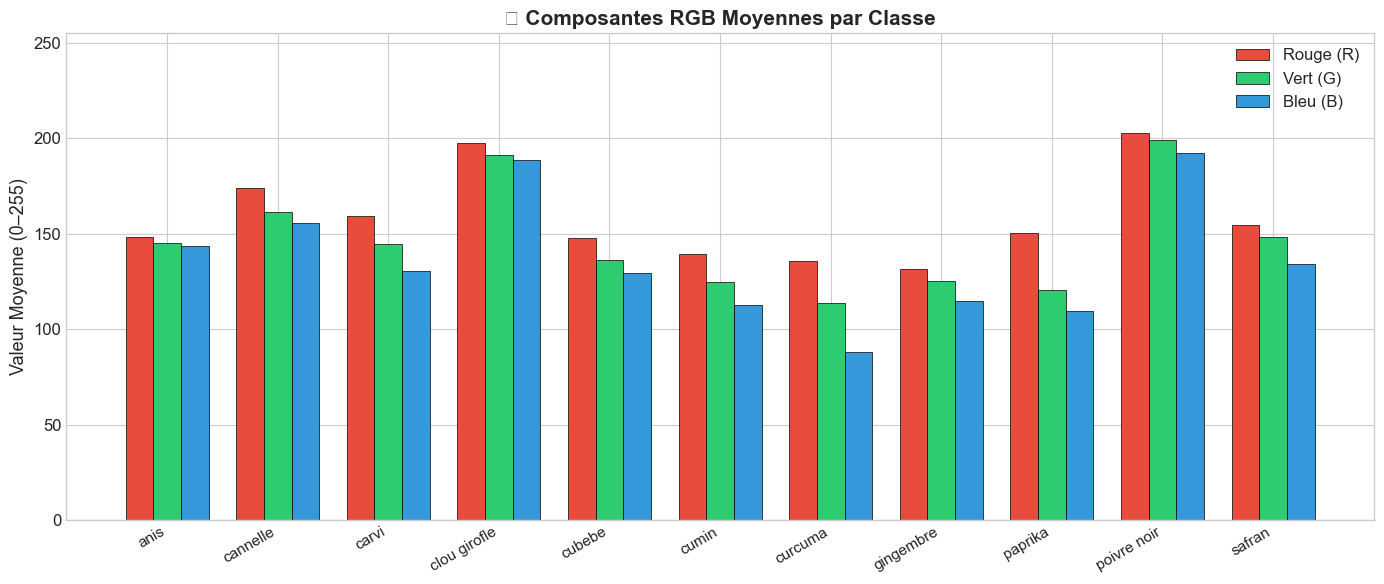

In [10]:
# =====================================================================
# GRAPHIQUE 5 : Histogramme RGB groupé par classe
# =====================================================================
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(CLASSES))   # Positions sur l'axe X
largeur = 0.25                 # Largeur de chaque barre

# Créer les 3 groupes de barres (R, G, B)
ax.bar(x - largeur, df_couleurs['R'], largeur, label='Rouge (R)', color='#e74c3c', edgecolor='black', linewidth=0.5)
ax.bar(x,           df_couleurs['G'], largeur, label='Vert (G)',  color='#2ecc71', edgecolor='black', linewidth=0.5)
ax.bar(x + largeur, df_couleurs['B'], largeur, label='Bleu (B)',  color='#3498db', edgecolor='black', linewidth=0.5)

# Labels et titre
ax.set_xticks(x)
ax.set_xticklabels([c.replace('_', ' ') for c in CLASSES], rotation=30, ha='right', fontsize=11)
ax.set_ylabel('Valeur Moyenne (0–255)', fontsize=13)
ax.set_title('🌈 Composantes RGB Moyennes par Classe', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.set_ylim(0, 255)

plt.tight_layout()
plt.show()

---
## 📊 Cellule 10 — Heatmap de la Similarité Couleur entre Classes

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\2041160574.py:32: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


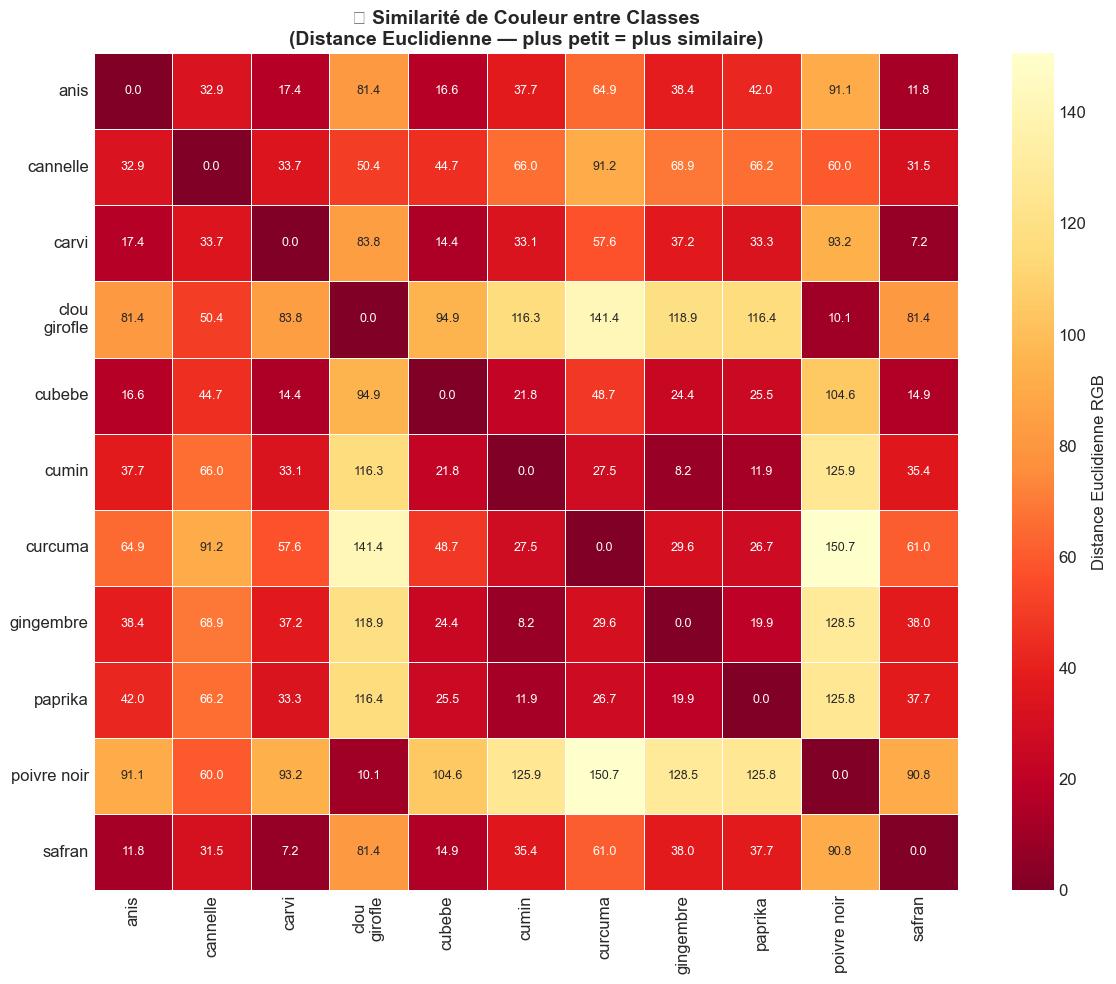

In [11]:
# =====================================================================
# HEATMAP : Distance euclidienne de couleur entre les classes
# (plus petit = plus similaire en couleur)
# =====================================================================
from scipy.spatial.distance import cdist  # Calculer les distances

# Extraire les valeurs RGB sous forme de matrice
rgb_matrix = df_couleurs[['R', 'G', 'B']].values

# Calculer la distance euclidienne entre chaque paire de classes
distance_matrix = cdist(rgb_matrix, rgb_matrix, metric='euclidean')

# Créer un DataFrame pour la heatmap
noms_courts = [c.replace('_', '\n') for c in CLASSES]
df_distance = pd.DataFrame(distance_matrix, index=noms_courts, columns=noms_courts)

# ---- Afficher la heatmap ----
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df_distance, 
            annot=True,           # Afficher les valeurs
            fmt='.1f',            # 1 décimale
            cmap='YlOrRd_r',      # Palette : vert = proche, rouge = loin
            linewidths=0.5,
            ax=ax,
            cbar_kws={'label': 'Distance Euclidienne RGB'},
            annot_kws={'size': 9})

ax.set_title('🔥 Similarité de Couleur entre Classes\n(Distance Euclidienne — plus petit = plus similaire)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 📉 Cellule 11 — Distribution de la Luminosité par Classe

In [12]:
# =====================================================================
# ANALYSE : Calculer la luminosité moyenne de chaque image
# Luminosité = moyenne des niveaux de gris (0=noir, 255=blanc)
# =====================================================================
luminosites = []  # Liste pour stocker les résultats

for classe in CLASSES:
    dossier = os.path.join(TRAIN_DIR, classe)
    for fichier in os.listdir(dossier):
        chemin = os.path.join(dossier, fichier)
        img = Image.open(chemin).convert('L')  # 'L' = niveaux de gris
        luminosites.append({
            'Classe': classe,
            'Luminosité': np.array(img).mean()
        })

df_lum = pd.DataFrame(luminosites)

# ---- Résumé par classe ----
print('💡 LUMINOSITÉ MOYENNE PAR CLASSE')
print('=' * 45)
print(df_lum.groupby('Classe')['Luminosité'].describe().round(2).to_string())

💡 LUMINOSITÉ MOYENNE PAR CLASSE
              count    mean    std     min     25%     50%     75%     max
Classe                                                                    
anis          140.0  145.75  11.70  113.36  136.96  148.58  153.40  183.65
cannelle      140.0  164.50  47.89   84.00  127.96  149.40  211.93  252.67
carvi         140.0  147.48  15.11  104.47  141.16  149.56  154.41  183.79
clou_girofle  140.0  192.75  58.73   71.27  140.71  232.09  245.08  252.08
cubebe        140.0  138.87  14.99   91.11  130.26  140.72  146.67  175.02
cumin         140.0  127.87  22.78   75.47  110.79  127.60  147.36  188.41
curcuma       140.0  117.33  22.10   50.05  105.01  114.69  134.53  166.05
gingembre     140.0  125.99  26.28   55.24  109.91  123.79  142.76  210.39
paprika       140.0  128.09  24.21   34.64  116.75  131.28  144.63  165.94
poivre noir   140.0  199.34  57.56   96.96  139.66  239.33  252.37  254.23
safran        140.0  148.72  18.52   92.66  140.66  149.45  159.04  

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\1659597286.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\1659597286.py:30: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


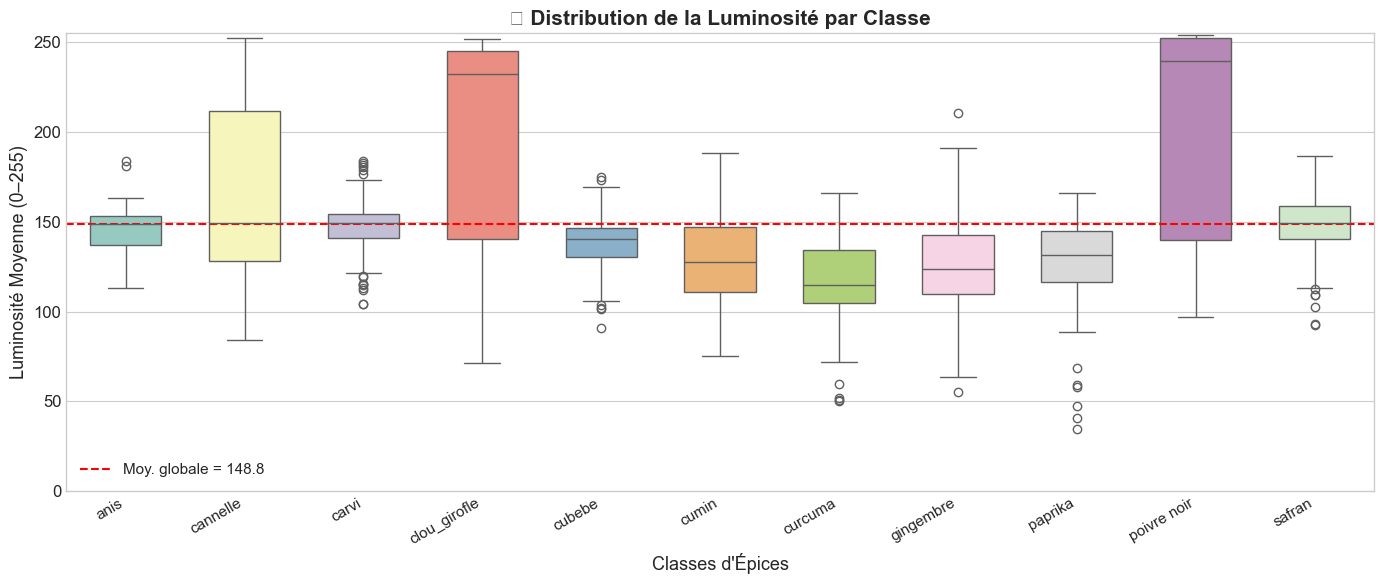

In [13]:
# =====================================================================
# GRAPHIQUE 6 : Boxplot de la luminosité par classe
# =====================================================================
fig, ax = plt.subplots(figsize=(14, 6))

# Couleurs pour chaque boxplot
couleurs_box = plt.cm.Set3(np.linspace(0, 1, len(CLASSES)))

sns.boxplot(
    data=df_lum,
    x='Classe',
    y='Luminosité',
    palette='Set3',
    order=CLASSES,
    width=0.6,
    ax=ax
)

ax.set_title('💡 Distribution de la Luminosité par Classe', fontsize=15, fontweight='bold')
ax.set_xlabel('Classes d\'Épices', fontsize=13)
ax.set_ylabel('Luminosité Moyenne (0–255)', fontsize=13)
ax.set_ylim(0, 255)

# Ligne horizontale : luminosité globale moyenne
moy_globale = df_lum['Luminosité'].mean()
ax.axhline(y=moy_globale, color='red', linestyle='--', linewidth=1.5, label=f'Moy. globale = {moy_globale:.1f}')
ax.legend(fontsize=11)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

---
## 📊 Cellule 12 — Histogramme de Couleur d'une Classe au Choix

C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4049293836.py:36: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\zaineb\.conda\envs\spices_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


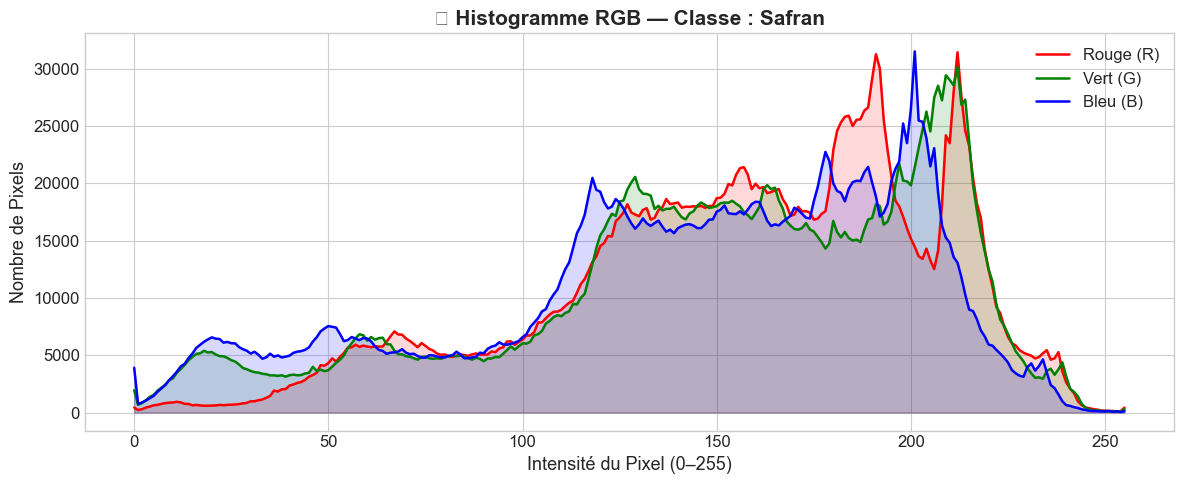

In [14]:
# =====================================================================
# GRAPHIQUE 7 : Histogramme de couleur (R, G, B) pour une classe
# ⚠️  Changez la variable CLASS_CHOISIE pour explorer d'autres épices
# =====================================================================
CLASS_CHOISIE = 'safran'  # ← MODIFIEZ ICI

dossier = os.path.join(TRAIN_DIR, CLASS_CHOISIE)
fichiers = os.listdir(dossier)

# Accumuler les histogrammes de 10 images
hist_r, hist_g, hist_b = np.zeros(256), np.zeros(256), np.zeros(256)

for fichier in fichiers[:10]:  # Prendre 10 images pour la vitesse
    img = np.array(Image.open(os.path.join(dossier, fichier)).convert('RGB'))
    hist_r += np.histogram(img[:,:,0], bins=256, range=(0,256))[0]
    hist_g += np.histogram(img[:,:,1], bins=256, range=(0,256))[0]
    hist_b += np.histogram(img[:,:,2], bins=256, range=(0,256))[0]

# ---- Tracer ----
fig, ax = plt.subplots(figsize=(12, 5))
valeurs_x = np.arange(256)

ax.plot(valeurs_x, hist_r, color='red',   label='Rouge (R)', linewidth=1.8)
ax.plot(valeurs_x, hist_g, color='green', label='Vert (G)',  linewidth=1.8)
ax.plot(valeurs_x, hist_b, color='blue',  label='Bleu (B)',  linewidth=1.8)

ax.fill_between(valeurs_x, hist_r, alpha=0.15, color='red')
ax.fill_between(valeurs_x, hist_g, alpha=0.15, color='green')
ax.fill_between(valeurs_x, hist_b, alpha=0.15, color='blue')

ax.set_title(f'🌈 Histogramme RGB — Classe : {CLASS_CHOISIE.replace("_", " ").title()}', fontsize=15, fontweight='bold')
ax.set_xlabel('Intensité du Pixel (0–255)', fontsize=13)
ax.set_ylabel('Nombre de Pixels', fontsize=13)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

---
## 🔍 Cellule 13 — Détection de Doublons (Images Identiques)

In [15]:
# =====================================================================
# DÉTECTION DE DOUBLONS : Utiliser le hash perceptuel (pHash)
# Si deux images ont le même hash → elles sont identiques (ou très proches)
# =====================================================================
import hashlib

def calculer_hash(chemin_image):
    """Calculer un hash basé sur les pixels de l'image (redimensionnée en 8x8 en niveaux de gris)"""
    img = Image.open(chemin_image).convert('L').resize((8, 8), Image.LANCZOS)
    pixels = np.array(img).flatten()
    moyenne = pixels.mean()
    # Comparer chaque pixel à la moyenne → créer un hash binaire
    bits = ''.join(['1' if p > moyenne else '0' for p in pixels])
    return bits

# ---- Calculer les hash pour toutes les images TRAIN ----
hash_dict = {}  # {hash: [(classe, fichier), ...]}

for classe in CLASSES:
    dossier = os.path.join(TRAIN_DIR, classe)
    for fichier in os.listdir(dossier):
        chemin = os.path.join(dossier, fichier)
        h = calculer_hash(chemin)
        if h not in hash_dict:
            hash_dict[h] = []
        hash_dict[h].append((classe, fichier))

# ---- Identifier les doublons (hash partagé par 2+ images) ----
doublons = {h: imgs for h, imgs in hash_dict.items() if len(imgs) > 1}

print('🔍 DÉTECTION DE DOUBLONS')
print('=' * 50)
if len(doublons) == 0:
    print('✅ Aucun doublon détecté ! Le dataset est propre.')
else:
    print(f'⚠️  {len(doublons)} groupe(s) de doublons détecté(s) :')
    for h, imgs in doublons.items():
        print(f'\n  → Groupe (hash: {h[:20]}...) :')
        for classe, fichier in imgs:
            print(f'      - {classe}/{fichier}')

🔍 DÉTECTION DE DOUBLONS
⚠️  113 groupe(s) de doublons détecté(s) :

  → Groupe (hash: 11111111111000111100...) :
      - anis/anis_0002.jpg
      - anis/anis_aug0002_brightness_down.jpg

  → Groupe (hash: 11111111110000111000...) :
      - anis/anis_0004.jpg
      - anis/anis_aug0004_brightness_up.jpg

  → Groupe (hash: 11111111110111111000...) :
      - anis/anis_0007.jpg
      - anis/anis_aug0007_sharpness.jpg

  → Groupe (hash: 11111111100011111000...) :
      - anis/anis_0013.jpg
      - anis/anis_aug0013_brightness_up.jpg

  → Groupe (hash: 11100001110000011100...) :
      - anis/anis_0014.jpg
      - anis/anis_aug0014_brightness_up.jpg

  → Groupe (hash: 11111111111100011100...) :
      - anis/anis_0020.jpg
      - anis/anis_aug0020_contrast_down.jpg

  → Groupe (hash: 11111111111110110000...) :
      - anis/anis_0021.jpg
      - anis/anis_aug0021_brightness_up.jpg

  → Groupe (hash: 11111111100011111000...) :
      - anis/anis_0022.jpg
      - anis/anis_aug0022_color.jpg

  → Gr

---
## 📋 Cellule 14 — Rapport Final (Résumé de l'EDA)

In [16]:
# =====================================================================
# RAPPORT FINAL : Résumé de toute l'analyse
# =====================================================================
print('\n' + '=' * 65)
print('  📋  RAPPORT FINAL — EDA ÉPICES MAROCAINES')
print('=' * 65)

print(f'\n📁 STRUCTURE DU DATASET')
print(f'   • Classes          : {len(CLASSES)}')
print(f'   • Images totales   : {df_comptage["Total"].sum()}')
print(f'   • Train            : {df_comptage["Train (70%)"].sum()} images')
print(f'   • Validation       : {df_comptage["Val (15%)"].sum()} images')
print(f'   • Test             : {df_comptage["Test (15%)"].sum()} images')

print(f'\n📐 DIMENSIONS')
print(f'   • Taille uniforme  : {df_dim["Largeur"].min()}x{df_dim["Hauteur"].min()} pixels')
print(f'   • Mode couleur     : {df_dim["Mode"].unique()}')

print(f'\n⚖️  ÉQUILIBRE DU DATASET')
min_train = df_comptage['Train (70%)'].min()
max_train = df_comptage['Train (70%)'].max()
print(f'   • Min images/classe (train) : {min_train}')
print(f'   • Max images/classe (train) : {max_train}')
if min_train == max_train:
    print(f'   • ✅ Dataset PARFAITEMENT ÉQUILIBRÉ')
else:
    print(f'   • ⚠️  Déséquilibre détecté → Considérer le sursamplage')

print(f'\n💡 LUMINOSITÉ')
print(f'   • Moyenne globale  : {df_lum["Luminosité"].mean():.1f} / 255')
print(f'   • Classe la plus claire  : {df_lum.groupby("Classe")["Luminosité"].mean().idxmax()}')
print(f'   • Classe la plus sombre  : {df_lum.groupby("Classe")["Luminosité"].mean().idxmin()}')

print(f'\n🔍 DOUBLONS')
print(f'   • Groupes de doublons : {len(doublons)}')

print(f'\n✅ CONCLUSION')
print(f'   Le dataset est bien structuré et prêt pour l\'entraînement.')
print(f'   Prochaine étape : Augmentation de données + MobileNetV3.')
print('\n' + '=' * 65)


  📋  RAPPORT FINAL — EDA ÉPICES MAROCAINES

📁 STRUCTURE DU DATASET
   • Classes          : 11
   • Images totales   : 2200
   • Train            : 1540 images
   • Validation       : 330 images
   • Test             : 330 images

📐 DIMENSIONS
   • Taille uniforme  : 384x384 pixels
   • Mode couleur     : ['RGB']

⚖️  ÉQUILIBRE DU DATASET
   • Min images/classe (train) : 140
   • Max images/classe (train) : 140
   • ✅ Dataset PARFAITEMENT ÉQUILIBRÉ

💡 LUMINOSITÉ
   • Moyenne globale  : 148.8 / 255
   • Classe la plus claire  : poivre noir
   • Classe la plus sombre  : curcuma

🔍 DOUBLONS
   • Groupes de doublons : 113

✅ CONCLUSION
   Le dataset est bien structuré et prêt pour l'entraînement.
   Prochaine étape : Augmentation de données + MobileNetV3.



In [ ]:
# =====================================================================
# EXPORT : Sauvegarder les résultats EDA en fichiers
# =====================================================================
import json
from pathlib import Path

# Créer un dossier de sortie
output_dir = Path('../eda_results')
output_dir.mkdir(exist_ok=True)

print(f'📂 Exporting results to: {output_dir.resolve()}\n')

# 1️⃣ Exporter les statistiques de comptage (CSV)
df_comptage.to_csv(output_dir / 'image_counts.csv', index=False)
print('✅ Saved: image_counts.csv')

# 2️⃣ Exporter les couleurs moyennes (CSV + JSON)
df_couleurs.to_csv(output_dir / 'color_analysis.csv', index=False)
couleurs_dict = {row['Classe']: {'R': row['R'], 'G': row['G'], 'B': row['B']} 
                 for _, row in df_couleurs.iterrows()}
with open(output_dir / 'color_analysis.json', 'w') as f:
    json.dump(couleurs_dict, f, indent=2)
print('✅ Saved: color_analysis.csv, color_analysis.json')

# 3️⃣ Exporter la luminosité par image (CSV)
df_lum.to_csv(output_dir / 'luminosity_per_image.csv', index=False)
print('✅ Saved: luminosity_per_image.csv')

# 4️⃣ Exporter la matrice de distance de couleur (CSV)
df_distance.to_csv(output_dir / 'color_distance_matrix.csv')
print('✅ Saved: color_distance_matrix.csv')

# 5️⃣ Créer et exporter un rapport de synthèse (JSON)
summary_report = {
    'dataset_structure': {
        'total_classes': len(CLASSES),
        'total_images': int(df_comptage['Total'].sum()),
        'train_images': int(df_comptage['Train (70%)'].sum()),
        'val_images': int(df_comptage['Val (15%)'].sum()),
        'test_images': int(df_comptage['Test (15%)'].sum()),
        'classes': CLASSES
    },
    'image_dimensions': {
        'width_min': int(df_dim['Largeur'].min()),
        'width_max': int(df_dim['Largeur'].max()),
        'width_mean': float(df_dim['Largeur'].mean()),
        'height_min': int(df_dim['Hauteur'].min()),
        'height_max': int(df_dim['Hauteur'].max()),
        'height_mean': float(df_dim['Hauteur'].mean()),
        'color_modes': list(df_dim['Mode'].unique())
    },
    'balance_metrics': {
        'min_images_per_class': int(df_comptage['Train (70%)'].min()),
        'max_images_per_class': int(df_comptage['Train (70%)'].max()),
        'is_balanced': bool(df_comptage['Train (70%)'].min() == df_comptage['Train (70%)'].max())
    },
    'color_statistics': {
        'mean_rgb': {
            'R': float(df_couleurs['R'].mean()),
            'G': float(df_couleurs['G'].mean()),
            'B': float(df_couleurs['B'].mean())
        },
        'std_rgb': {
            'R': float(df_couleurs['R'].std()),
            'G': float(df_couleurs['G'].std()),
            'B': float(df_couleurs['B'].std())
        }
    },
    'luminosity_statistics': {
        'mean': float(df_lum['Luminosité'].mean()),
        'std': float(df_lum['Luminosité'].std()),
        'min': float(df_lum['Luminosité'].min()),
        'max': float(df_lum['Luminosité'].max()),
        'brightest_class': df_lum.groupby('Classe')['Luminosité'].mean().idxmax(),
        'darkest_class': df_lum.groupby('Classe')['Luminosité'].mean().idxmin()
    },
    'duplicate_analysis': {
        'duplicate_groups': len(doublons),
        'has_duplicates': len(doublons) > 0
    }
}

with open(output_dir / 'eda_summary.json', 'w') as f:
    json.dump(summary_report, f, indent=2)
print('✅ Saved: eda_summary.json')

# 6️⃣ Exporter les statistiques par classe (JSON)
class_stats = {}
for classe in CLASSES:
    class_lum = df_lum[df_lum['Classe'] == classe]['Luminosité']
    class_stats[classe] = {
        'train_count': int(df_comptage[df_comptage['Classe'] == classe]['Train (70%)'].values[0]),
        'val_count': int(df_comptage[df_comptage['Classe'] == classe]['Val (15%)'].values[0]),
        'test_count': int(df_comptage[df_comptage['Classe'] == classe]['Test (15%)'].values[0]),
        'mean_rgb': couleurs_dict[classe],
        'mean_luminosity': float(class_lum.mean()),
        'luminosity_std': float(class_lum.std())
    }

with open(output_dir / 'class_statistics.json', 'w') as f:
    json.dump(class_stats, f, indent=2)
print('✅ Saved: class_statistics.json')

print(f'\n✨ All EDA results exported ')
print('\n📊 Files created:')
print('   • image_counts.csv')
print('   • color_analysis.csv')
print('   • color_analysis.json')
print('   • luminosity_per_image.csv')
print('   • color_distance_matrix.csv')
print('   • eda_summary.json')
print('   • class_statistics.json')

📂 Exporting results to: ..\eda_results_z

✅ Saved: image_counts.csv
✅ Saved: color_analysis.csv, color_analysis.json
✅ Saved: luminosity_per_image.csv
✅ Saved: color_distance_matrix.csv
✅ Saved: eda_summary.json
✅ Saved: class_statistics.json

✨ All EDA results exported to: c:\Users\zaineb\Desktop\spices 2-2\notebooks\..\eda_results_z

📊 Files created:
   • image_counts.csv
   • color_analysis.csv
   • color_analysis.json
   • luminosity_per_image.csv
   • color_distance_matrix.csv
   • eda_summary.json
   • class_statistics.json


In [ ]:

# =====================================================================
# EXPORT IMAGES : Sauvegarder tous les graphiques en PNG
# =====================================================================
import matplotlib
matplotlib.use('Agg')  # Backend non-interactif pour éviter les problèmes

output_dir = Path('../eda_results_z/images')
output_dir.mkdir(exist_ok=True)

print('🖼️  Exporting visualization images...\n')

# 1️⃣ GRAPHIQUE 1 : Nombre d'images par classe
fig, ax = plt.subplots(figsize=(14, 6))
couleurs = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(CLASSES)))
barres = ax.bar(df_comptage['Classe'], df_comptage['Train (70%)'], color=couleurs, 
                edgecolor='black', linewidth=0.8, width=0.6)
for barre in barres:
    hauteur = barre.get_height()
    ax.text(barre.get_x() + barre.get_width()/2., hauteur + 1,
            f'{int(hauteur)}', ha='center', va='bottom', fontweight='bold', fontsize=11)
moyenne_train = df_comptage['Train (70%)'].mean()
ax.axhline(y=moyenne_train, color='red', linestyle='--', linewidth=2, label=f'Moyenne = {moyenne_train:.0f}')
ax.set_title('📊 Nombre d\'Images par Classe — Ensemble TRAIN', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Classes d\'Épices', fontsize=13)
ax.set_ylabel('Nombre d\'Images', fontsize=13)
ax.legend(fontsize=12)
ax.set_ylim(0, max(df_comptage['Train (70%)']) + 15)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.savefig(output_dir / '01_image_distribution_train.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 01_image_distribution_train.png')

# 2️⃣ GRAPHIQUE 2 : Pie chart Train/Val/Test
totaux = [df_comptage['Train (70%)'].sum(), df_comptage['Val (15%)'].sum(), df_comptage['Test (15%)'].sum()]
labels = ['Train (70%)', 'Validation (15%)', 'Test (15%)']
couleurs_pie = ['#2ecc71', '#3498db', '#e74c3c']
fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(totaux, labels=labels, colors=couleurs_pie, autopct='%1.1f%%',
                                    startangle=140, explode=(0.03, 0.03, 0.03), shadow=True)
for text in autotexts:
    text.set_fontsize(13)
    text.set_fontweight('bold')
for text in texts:
    text.set_fontsize(12)
ax.set_title('🥧 Répartition Globale du Dataset', fontsize=15, fontweight='bold', pad=20)
ax.text(0, -1.35, f'Total : {sum(totaux)} images | {len(CLASSES)} classes',
        ha='center', fontsize=12, style='italic', color='#555555')
plt.tight_layout()
plt.savefig(output_dir / '02_split_distribution.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 02_split_distribution.png')

# 3️⃣ GRAPHIQUE 3 : Couleur moyenne
fig, ax = plt.subplots(figsize=(14, 4))
for i, row in df_couleurs.iterrows():
    couleur_norm = (row['R']/255, row['G']/255, row['B']/255)
    ax.barh(row['Classe'], 1, color=couleur_norm, edgecolor='black', linewidth=0.8, height=0.7)
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_title('🎨 Couleur Moyenne de Chaque Classe d\'Épice', fontsize=15, fontweight='bold')
ax.set_ylabel('Classes', fontsize=12)
plt.tight_layout()
plt.savefig(output_dir / '03_average_colors.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 03_average_colors.png')

# 4️⃣ GRAPHIQUE 4 : Histogramme RGB
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(CLASSES))
largeur = 0.25
ax.bar(x - largeur, df_couleurs['R'], largeur, label='Rouge (R)', color='#e74c3c', edgecolor='black', linewidth=0.5)
ax.bar(x,           df_couleurs['G'], largeur, label='Vert (G)',  color='#2ecc71', edgecolor='black', linewidth=0.5)
ax.bar(x + largeur, df_couleurs['B'], largeur, label='Bleu (B)',  color='#3498db', edgecolor='black', linewidth=0.5)
ax.set_xticks(x)
ax.set_xticklabels([c.replace('_', ' ') for c in CLASSES], rotation=30, ha='right', fontsize=11)
ax.set_ylabel('Valeur Moyenne (0–255)', fontsize=13)
ax.set_title('🌈 Composantes RGB Moyennes par Classe', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.set_ylim(0, 255)
plt.tight_layout()
plt.savefig(output_dir / '04_rgb_components.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 04_rgb_components.png')

# 5️⃣ GRAPHIQUE 5 : Heatmap distance couleur
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_distance, annot=True, fmt='.1f', cmap='YlOrRd_r', linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Distance Euclidienne RGB'}, annot_kws={'size': 9})
ax.set_title('🔥 Similarité de Couleur entre Classes\n(Distance Euclidienne — plus petit = plus similaire)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / '05_color_distance_heatmap.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 05_color_distance_heatmap.png')

# 6️⃣ GRAPHIQUE 6 : Boxplot luminosité
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_lum, x='Classe', y='Luminosité', palette='Set3', order=CLASSES, width=0.6, ax=ax)
ax.set_title('💡 Distribution de la Luminosité par Classe', fontsize=15, fontweight='bold')
ax.set_xlabel('Classes d\'Épices', fontsize=13)
ax.set_ylabel('Luminosité Moyenne (0–255)', fontsize=13)
ax.set_ylim(0, 255)
moy_globale = df_lum['Luminosité'].mean()
ax.axhline(y=moy_globale, color='red', linestyle='--', linewidth=1.5, label=f'Moy. globale = {moy_globale:.1f}')
ax.legend(fontsize=11)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.savefig(output_dir / '06_luminosity_distribution.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 06_luminosity_distribution.png')

# 7️⃣ GRAPHIQUE 7 : Histogramme couleur (safran)
CLASS_CHOISIE = 'safran'
dossier = os.path.join(TRAIN_DIR, CLASS_CHOISIE)
fichiers = os.listdir(dossier)
hist_r, hist_g, hist_b = np.zeros(256), np.zeros(256), np.zeros(256)
for fichier in fichiers[:10]:
    img = np.array(Image.open(os.path.join(dossier, fichier)).convert('RGB'))
    hist_r += np.histogram(img[:,:,0], bins=256, range=(0,256))[0]
    hist_g += np.histogram(img[:,:,1], bins=256, range=(0,256))[0]
    hist_b += np.histogram(img[:,:,2], bins=256, range=(0,256))[0]
fig, ax = plt.subplots(figsize=(12, 5))
valeurs_x = np.arange(256)
ax.plot(valeurs_x, hist_r, color='red',   label='Rouge (R)', linewidth=1.8)
ax.plot(valeurs_x, hist_g, color='green', label='Vert (G)',  linewidth=1.8)
ax.plot(valeurs_x, hist_b, color='blue',  label='Bleu (B)',  linewidth=1.8)
ax.fill_between(valeurs_x, hist_r, alpha=0.15, color='red')
ax.fill_between(valeurs_x, hist_g, alpha=0.15, color='green')
ax.fill_between(valeurs_x, hist_b, alpha=0.15, color='blue')
ax.set_title(f'🌈 Histogramme RGB — Classe : {CLASS_CHOISIE.replace("_", " ").title()}', fontsize=15, fontweight='bold')
ax.set_xlabel('Intensité du Pixel (0–255)', fontsize=13)
ax.set_ylabel('Nombre de Pixels', fontsize=13)
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig(output_dir / '07_color_histogram_safran.png', dpi=150, bbox_inches='tight')
plt.close()
print('✅ Saved: 07_color_histogram_safran.png')

print(f'\n✨ All visualization images exported ')
print('\n🖼️  Image files created:')
print('   • 01_image_distribution_train.png')
print('   • 02_split_distribution.png')
print('   • 03_average_colors.png')
print('   • 04_rgb_components.png')
print('   • 05_color_distance_heatmap.png')
print('   • 06_luminosity_distribution.png')
print('   • 07_color_histogram_safran.png')


🖼️  Exporting visualization images...



C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(output_dir / '01_image_distribution_train.png', dpi=150, bbox_inches='tight')


✅ Saved: 01_image_distribution_train.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:49: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:50: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  plt.savefig(output_dir / '02_split_distribution.png', dpi=150, bbox_inches='tight')


✅ Saved: 02_split_distribution.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:63: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:64: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Arial.
  plt.savefig(output_dir / '03_average_colors.png', dpi=150, bbox_inches='tight')


✅ Saved: 03_average_colors.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:81: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:82: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.savefig(output_dir / '04_rgb_components.png', dpi=150, bbox_inches='tight')


✅ Saved: 04_rgb_components.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:92: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:93: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.savefig(output_dir / '05_color_distance_heatmap.png', dpi=150, bbox_inches='tight')


✅ Saved: 05_color_distance_heatmap.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lum, x='Classe', y='Luminosité', palette='Set3', order=CLASSES, width=0.6, ax=ax)
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:108: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:109: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.savefig(output_dir / '06_luminosity_distribution.png', dpi=150, bbox_inches='tight')


✅ Saved: 06_luminosity_distribution.png


C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:135: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zaineb\AppData\Local\Temp\ipykernel_16928\4124582441.py:136: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.savefig(output_dir / '07_color_histogram_safran.png', dpi=150, bbox_inches='tight')


✅ Saved: 07_color_histogram_safran.png

✨ All visualization images exported to: C:\Users\zaineb\Desktop\spices 2-2\eda_results

🖼️  Image files created:
   • 01_image_distribution_train.png
   • 02_split_distribution.png
   • 03_average_colors.png
   • 04_rgb_components.png
   • 05_color_distance_heatmap.png
   • 06_luminosity_distribution.png
   • 07_color_histogram_safran.png


---
## 📊 Cellule 15 — Distributions Avancées (Fichiers, Dimensions, Contraste)

In [19]:

# =====================================================================
# ANALYSE AVANCÉE : Distributions multiples (fichiers, dimensions, contraste)
# =====================================================================
import os
from PIL import Image, ImageStat

# ---- Calculer statistiques additionnelles ----
image_stats = []

for classe in CLASSES:
    dossier = os.path.join(TRAIN_DIR, classe)
    for fichier in os.listdir(dossier):
        chemin = os.path.join(dossier, fichier)
        
        # Taille du fichier
        file_size_kb = os.path.getsize(chemin) / 1024
        
        # Dimensions et aspect ratio
        img = Image.open(chemin)
        width, height = img.size
        aspect_ratio = width / height if height > 0 else 1
        
        # Contraste (écart-type des pixels)
        img_array = np.array(img.convert('L'))
        contrast = np.std(img_array)
        
        # Saturation moyenne (HSV color space)
        img_hsv = img.convert('HSV')
        pixels_hsv = np.array(img_hsv)
        saturation = pixels_hsv[:,:,1].mean() if pixels_hsv.shape[2] > 1 else 0
        
        image_stats.append({
            'Classe': classe,
            'Fichier': fichier,
            'Taille_KB': file_size_kb,
            'Largeur': width,
            'Hauteur': height,
            'Aspect_Ratio': aspect_ratio,
            'Contraste': contrast,
            'Saturation': saturation
        })

df_stats = pd.DataFrame(image_stats)

print('📊 STATISTIQUES ADDITIONNELLES')
print('=' * 60)
print(f'Taille des fichiers      : Min={df_stats["Taille_KB"].min():.1f}KB | Max={df_stats["Taille_KB"].max():.1f}KB | Moy={df_stats["Taille_KB"].mean():.1f}KB')
print(f'Aspect ratio             : Min={df_stats["Aspect_Ratio"].min():.2f} | Max={df_stats["Aspect_Ratio"].max():.2f}')
print(f'Contraste                : Min={df_stats["Contraste"].min():.1f} | Max={df_stats["Contraste"].max():.1f} | Moy={df_stats["Contraste"].mean():.1f}')
print(f'Saturation               : Min={df_stats["Saturation"].min():.1f} | Max={df_stats["Saturation"].max():.1f} | Moy={df_stats["Saturation"].mean():.1f}')


📊 STATISTIQUES ADDITIONNELLES
Taille des fichiers      : Min=6.7KB | Max=324.9KB | Moy=58.4KB
Aspect ratio             : Min=0.46 | Max=2.22
Contraste                : Min=4.6 | Max=95.6 | Moy=50.0
Saturation               : Min=0.1 | Max=236.3 | Moy=62.8
